## Дипломная работа по курсу "Python для анализа данных"

Признаки:  
1. satisfaction_level​ - Уровень удовлетворенности работой  
2. Last_evaluation ​- Время с момента последней оценки в годах  
3. number_projects​ - Количество проектов, выполненных за время работы  
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц  
5. time_spend_company​ - Стаж работы в компании в годах  
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. left​ - уволился ли сотрудник  
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет  
9. department ​- отдел в котором работает сотрудник  
10. salary​ - относительный уровень зарплаты

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv('HR.csv')

In [66]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Разделим для удобства датафрейм на два: первый будет содержать только количественные признаки, второй - категориальные

In [19]:
df_quantitat = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
df_category = df[['Work_accident','left','promotion_last_5years','department','salary']]

### Основные статистические метрики
Метрики для числовых признаков - среднее арифметическое, стандартное отклонение, минимум, максимум, 50-й процентиль соответствует медиане

In [20]:
df_quantitat.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


Для категориальных признаков показательна мода


In [29]:
df_mode = pd.DataFrame()
for col in df_category.columns:
    new_row = {'Attribute': col, 'Mode': df_category[col].mode()[0]}
    df_mode = pd.concat([df_mode, pd.DataFrame([new_row])])

df_mode

,Attribute,Mode
0,Work_accident,0
0,left,0
0,promotion_last_5years,0
0,department,sales
0,salary,low


### Корреляционная матрица и ее визуализация

In [64]:
df_quantitat.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

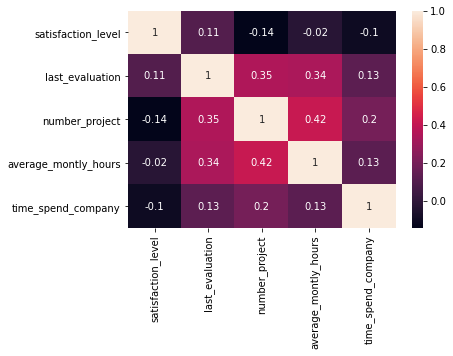

In [38]:
sns.heatmap(df_quantitat.corr(), annot=True)

Наиболее взаимосвязанные признаки - количество проектов и среднее количество рабочих часов в месяц.  
Это логично - чем дольше сотрудник работает, тем больше успевает сделать.

Практически отсутствует взаимосвязь между уровнем удовлетворенности и средним количеством рабочих часов в месяц.

### Распределение

Количество сотрудников по департаментам

In [65]:
df.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

Распределение сотрудников по зарплатам

In [124]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Распределение сотрудников по зарплатам в каждом департаменте

In [81]:
df.pivot_table(index='department', columns='salary', aggfunc='size')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


### Проверка гипотезы

In [134]:
df[df.salary == 'low']['average_montly_hours'].mean()
df[df.salary == 'high']['average_montly_hours'].mean()

199.86742118027485

### Показатели уволившихся и не уволившихся сотрудников

In [91]:
df_fired = df[df.left == 1]
df_active = df[df.left == 0]

In [131]:
df_metrics = pd.DataFrame()
rows = []

rows.append(
    {
    'Показатель': 'Доля получивших повышение',
    'Уволившиеся': round(df_fired.promotion_last_5years.value_counts(normalize=True)[1], 3),
    'Действующие': round(df_active.promotion_last_5years.value_counts(normalize=True)[1], 3)
    }
)

rows.append(
    {
    'Показатель': 'Средняя степень удовлетворенности',
    'Уволившиеся': round(df_fired.satisfaction_level.mean(), 3),
    'Действующие': round(df_active.satisfaction_level.mean(), 3)
    }
)

rows.append(
    {
    'Показатель': 'Среднее количество проектов',
    'Уволившиеся': round(df_fired.number_project.mean(), 3),
    'Действующие': round(df_active.number_project.mean(), 3)
    }
)

for row in rows:
    df_metrics = pd.concat([df_metrics, pd.DataFrame([row])])

df_metrics

,Показатель,Уволившиеся,Действующие
0,Доля получивших повышение,0.005,0.026
0,Средняя степень удовлетворенности,0.440,0.667
0,Среднее количество проектов,3.856,3.787


### Модель LDA

In [145]:
X = df.drop(['left','department','salary'], axis=1)
Y = df.left

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) #random_state=80)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

Y_pred = lda.predict(X_test)

df2 = X_test
df2['left_fact'] = Y_test
df2['left_predict'] = Y_pred

df2.head()



<ipython-input-145-ade602f7ad59>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['left_fact'] = Y_test
<ipython-input-145-ade602f7ad59>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['left_predict'] = Y_pred


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left_fact,left_predict
347,0.11,0.80,6,282,4,0,0,1,1
12334,0.10,0.81,6,290,4,0,0,1,1
8903,0.65,0.84,3,189,2,1,0,0,0
5407,0.49,0.74,3,229,3,1,0,0,0
5506,0.92,0.81,3,196,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8859,0.69,0.54,5,152,3,1,0,0,0
3084,0.34,0.57,4,152,3,1,0,0,0
2570,0.80,0.96,3,257,5,0,0,0,0
1681,0.83,0.94,4,264,5,0,0,1,0
